# Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from particula import Particula
from funcoes import step, lista_inicial
plt.style.use('seaborn-bright')

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_21228\1874228641.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


# Simulação:

In [2]:
# parâmetros sistema:
NUM_PARTICULAS= 2000
TAMANHO_CAIXA = 800
MASSA = 1
RAIO = 2

# parâmetros simulação:
TFIM = 15
NUM_STEPS = 100
STEP = TFIM/NUM_STEPS

In [3]:
PARTICULAS = lista_inicial(NUM_PARTICULAS, raio = RAIO, massa = MASSA, tamanho_caixa = TAMANHO_CAIXA)

# Compute simulation (It takes some time if stepnumber and particle_number are large)
for i in range(NUM_STEPS):
    step(PARTICULAS, STEP, TAMANHO_CAIXA)
    #print(i)

# Resultados:

### Animação das partículas:

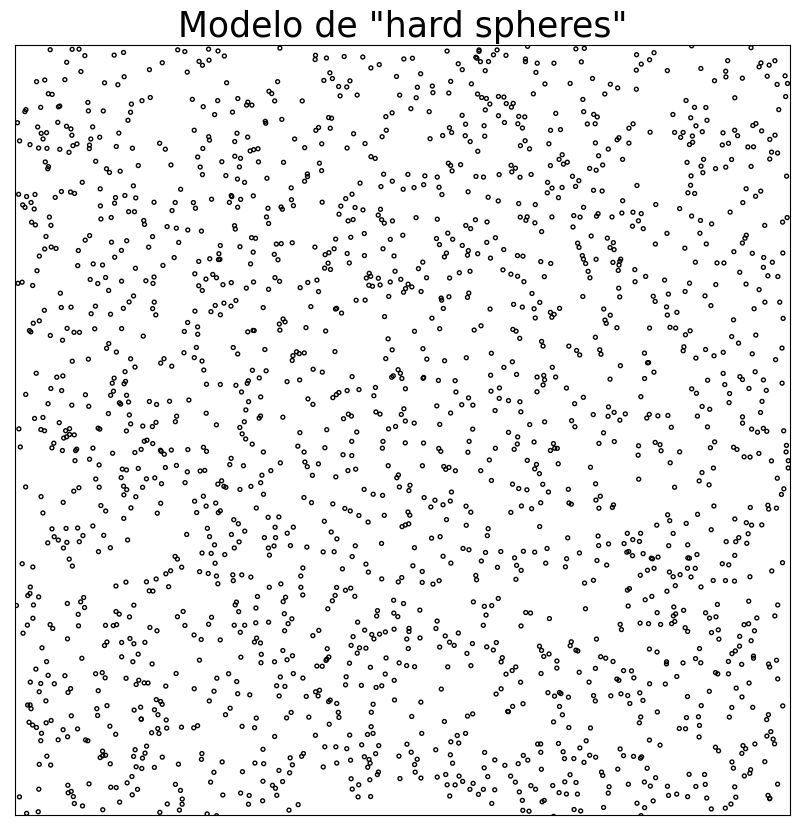

In [4]:
trajetorias = []
for i in PARTICULAS:
    traj = list(i.trapos)
    trajetorias.append(traj)
fig, ax = plt.subplots(1, 1, figsize = (10,10))
ims = []
#ax.set_xlabel('Posição (x)')
#ax.set_ylabel('Temperatura (u)')
#ax.set_title('Equação da Advecção', fontsize = 16)
ax.set_xlim(0,TAMANHO_CAIXA)
ax.set_ylim(0,TAMANHO_CAIXA)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Modelo de "hard spheres"', fontsize = 25)

for k in range(NUM_STEPS):
    circles = []
    for traj in trajetorias:
        x = traj[k][0]
        y = traj[k][1]
        circle = plt.Circle((x, y), RAIO, fill=False)
        ax.add_artist(circle)
        circles.append(circle)
    ims.append(circles)

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=15, bitrate=9000)
ani.save(r"resultados/trajetorias.png", writer=writer, dpi=200)

### Conservação do momento:

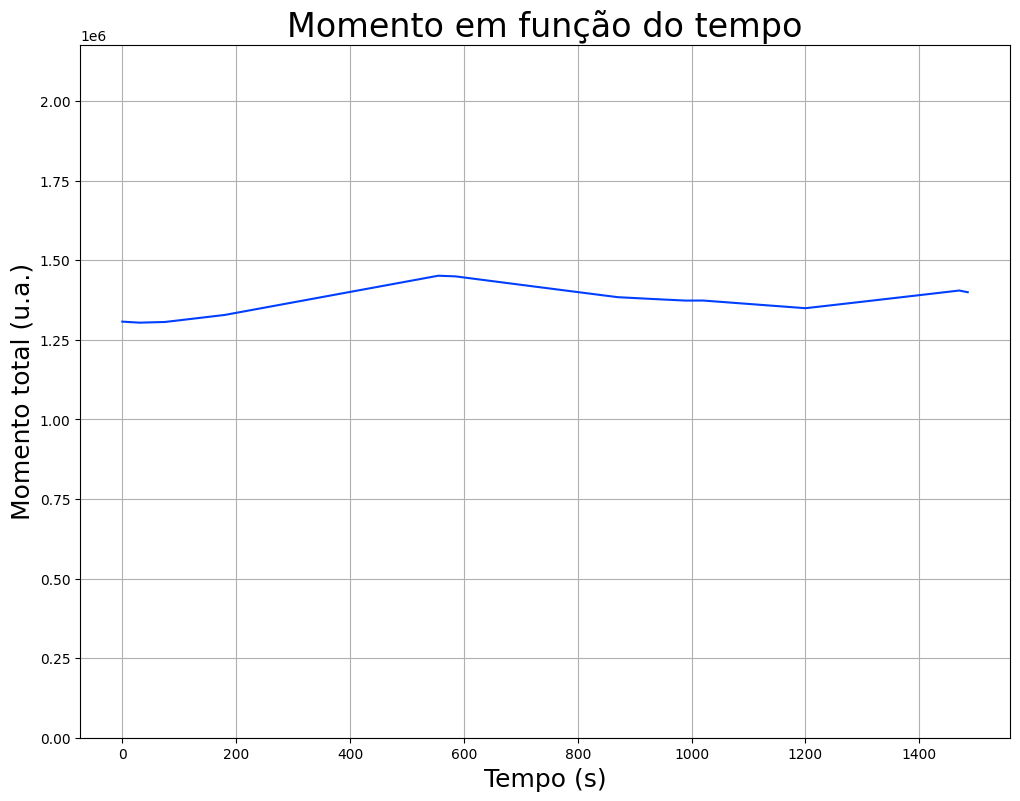

In [5]:
Vtrajetorias = []
for i in PARTICULAS:
    vtraj = list(i.travel)
    Vtrajetorias.append(vtraj)
lista_p_total = []
for t in range(NUM_STEPS):
    p_total = 0
    for vtraj in Vtrajetorias:
        p = MASSA*np.linalg.norm(traj[t])
        p_total += p
    lista_p_total.append(p_total)

    
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Momento em função do tempo', fontsize = 24)
ax.set_xlabel('Tempo (s)', fontsize = 18)
ax.set_ylabel('Momento total (u.a.)', fontsize = 18)
ax.grid()
ax.plot(np.array((range(NUM_STEPS)))*TFIM, lista_p_total)
ax.set_ylim(0,max(lista_p_total)*1.5)
plt.savefig(r'resultados/PxT.png', dpi = 200)

### Conservação da energia:

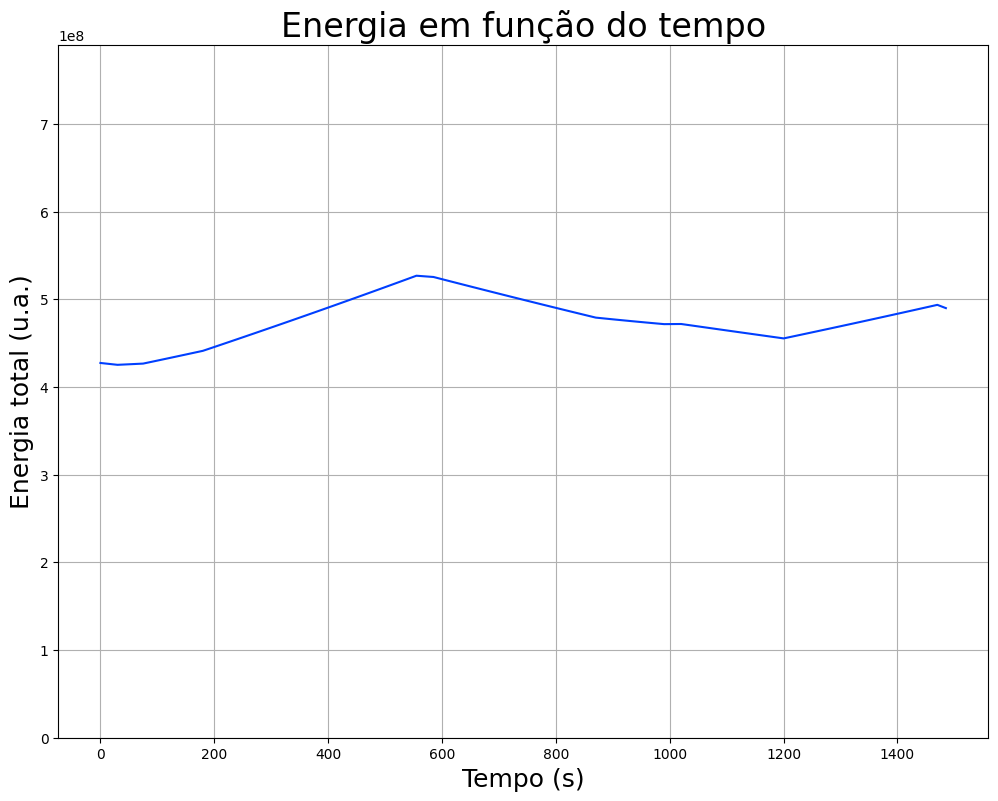

In [6]:
lista_k_total = []
for t in range(NUM_STEPS):
    k_total = 0
    for vtraj in Vtrajetorias:
        k = MASSA*(np.linalg.norm(traj[t]))**2/2
        k_total += k
    lista_k_total.append(k_total)

    
fig, ax = plt.subplots(1,1, figsize = (12, 9))
ax.set_title('Energia em função do tempo', fontsize = 24)
ax.set_xlabel('Tempo (s)', fontsize = 18)
ax.set_ylabel('Energia total (u.a.)', fontsize = 18)
ax.grid()
ax.plot(np.array((range(NUM_STEPS)))*TFIM, lista_k_total)
ax.set_ylim(0,max(lista_k_total)*1.5)
plt.savefig(r'resultados/ExT.png', dpi = 200)

### Distribuição de Maxwell-Boltzman

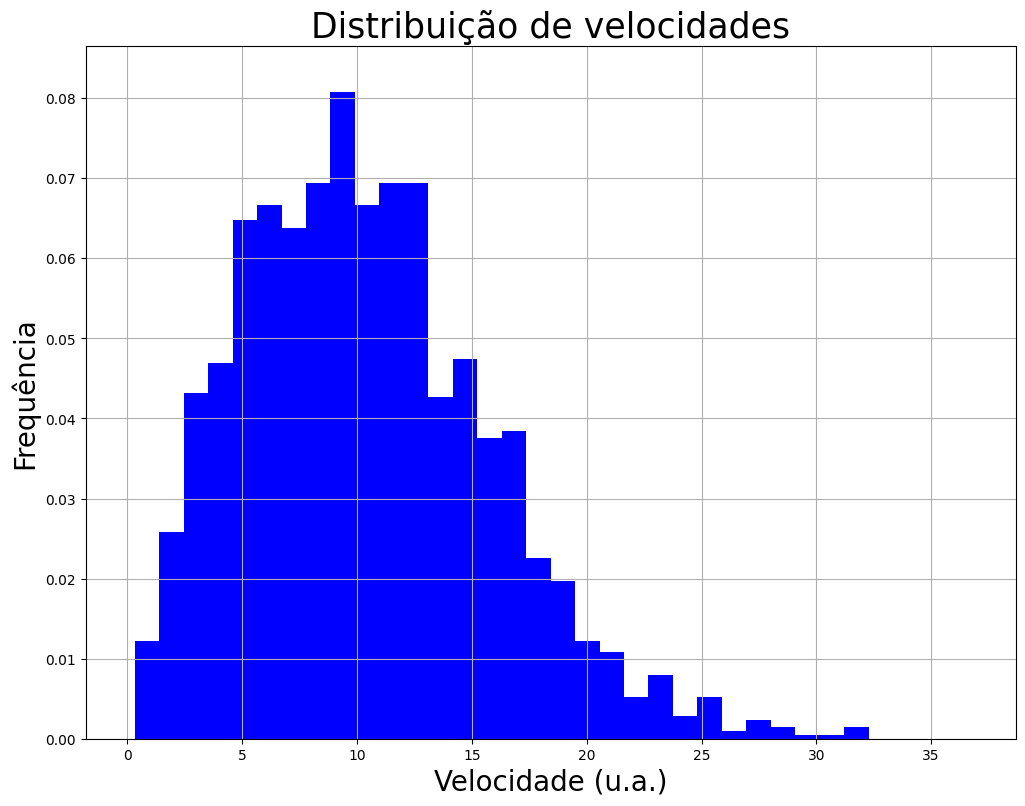

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ims = []
ax.set_title('Distribuição de velocidades', fontsize = 25)
ax.set_xlabel('Velocidade (u.a.)',fontsize = 20)
ax.set_ylabel('Frequência',fontsize = 20)
ax.grid('--')

for t in range(NUM_STEPS):
    velocidades = []
    for vtraj in Vtrajetorias:
        v = np.linalg.norm(vtraj[t])
        velocidades.append(v)
    im = ax.hist(velocidades, color='blue', bins = 30, density = True)
    ims.append(im[2]) 

ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=15, bitrate=9000)
ani.save(r"resultados/maxwell-boltzman.png", writer=writer, dpi=200)